In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    optimal = np.linalg.solve(tx.transpose()@tx, tx.transpose()@y)
    e = y - tx @ optimal
    mse = 1/(2*len(y)) * e.transpose() @ e
    return mse, optimal
    # ***************************************************
    raise NotImplementedError 

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    return least_squares(y, tx)
    # ***************************************************
    raise NotImplementedError

Test it here

In [4]:
test_your_least_squares()

(15.385887868829398, array([73.293922  , 13.47971243]))

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))
print(x)

shape of x (50,)
shape of y (50,)
[0.35237491 4.8951233  1.86662437 3.50706129 3.38087384 0.73093728
 3.88562366 5.65224803 6.28318531 2.37137419 0.60474982 3.63324875
 0.85712473 2.49756165 1.61424946 5.39987312 6.15699785 6.0308104
 0.47856237 2.87612401 4.51656093 0.98331219 1.10949964 0.1
 2.11899928 1.36187455 4.01181111 5.77843549 4.26418602 1.2356871
 2.24518674 1.99281183 1.48806201 4.64274839 4.39037348 3.00231147
 0.22618746 5.27368567 5.02131076 5.52606058 2.6237491  4.76893584
 3.12849893 1.74043692 3.7594362  3.25468638 5.90462294 4.13799857
 2.74993656 5.14749821]


In [6]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    xdeg = np.ones(len(x))
    for k in range(1,degree+1):
        xdeg = np.c_[xdeg, x**k]
    return xdeg    
    # ***************************************************
    raise NotImplementedError   
print(build_poly(x[:7],2))    

[[ 1.          0.35237491  0.12416808]
 [ 1.          4.8951233  23.96223211]
 [ 1.          1.86662437  3.48428655]
 [ 1.          3.50706129 12.29947891]
 [ 1.          3.38087384 11.43030789]
 [ 1.          0.73093728  0.5342693 ]
 [ 1.          3.88562366 15.0980712 ]]


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [7]:
from plots import *

def compute_loss(y, tx, w):
    e=y-tx@w
    return 1/(2*len(y)) * np.transpose(e)@e

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        x, y = load_data()
        tx = build_poly(x, degree)
        # ***************************************************
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        mse, weights = least_squares(y, tx)
        rmse = np.sqrt(2*mse)
        # ***************************************************
        #raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773748
Processing 3th experiment, degree=7, rmse=0.24965870360907552
Processing 4th experiment, degree=12, rmse=0.24328247481248672


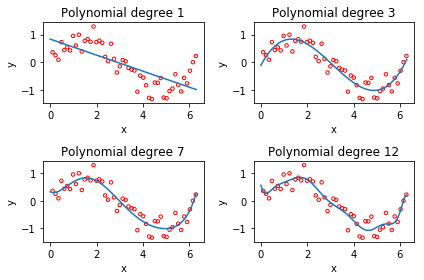

In [8]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [15]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    np.random.shuffle(x)
    np.random.seed(seed)
    np.random.shuffle(y)
    n = ratio * len(y)
    n = int(n)
    return x[:n], y[:n], x[n:], y[n:]
    # ***************************************************
    raise NotImplementedError

Then, test your `split_data` function below.

In [16]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    mse_tr, weights = least_squares(y_train, x_train)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    rmse_tr = np.sqrt(2*mse_tr)
    e_test = y_test - x_test @ weights
    mse_te = 1/(2*len(y_test)) * e_test.transpose() @ e_test
    rmse_te = np.sqrt(2*mse_te)
    # ***************************************************
    #raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [17]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)
    print("\n")    

proportion=0.9, degree=1, Training RMSE=0.484, Testing RMSE=0.362
proportion=0.9, degree=3, Training RMSE=0.253, Testing RMSE=0.316
proportion=0.9, degree=7, Training RMSE=0.239, Testing RMSE=0.373
proportion=0.9, degree=12, Training RMSE=0.228, Testing RMSE=0.430


proportion=0.5, degree=1, Training RMSE=0.350, Testing RMSE=0.579
proportion=0.5, degree=3, Training RMSE=0.290, Testing RMSE=0.235
proportion=0.5, degree=7, Training RMSE=0.222, Testing RMSE=0.310
proportion=0.5, degree=12, Training RMSE=0.197, Testing RMSE=0.403


proportion=0.1, degree=1, Training RMSE=0.600, Testing RMSE=0.471
proportion=0.1, degree=3, Training RMSE=0.097, Testing RMSE=0.354
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=7.995
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=1.943




# 3 Ridge Regression
Please fill in the function below.

In [18]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    a,b=tx.shape
    eye = np.eye(b)
    w = np.linalg.solve(2*a*lambda_*eye + tx.transpose()@tx, tx.transpose()@y)
    e = y - tx @ w
    mse = 1/(2*len(y)) * e.transpose() @ e
    return mse, w
    # ***************************************************
    #raise NotImplementedError  

In [19]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    # ***************************************************
    #raise NotImplementedError

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        mse_train, weights = ridge_regression(y_train, x_train, lambda_)
        rmse_tr.append(np.sqrt(2*mse_train))
        
        e_test = y_test - x_test @ weights
        mse_test = 1/(2*len(y_test)) * e_test.transpose() @ e_test 
        rmse_te.append(np.sqrt(2*mse_test))
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    #raise NotImplementedError


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.223, Testing RMSE=0.313
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.223, Testing RMSE=0.313
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.223, Testing RMSE=0.312
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.223, Testing RMSE=0.310
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.223, Testing RMSE=0.307
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.224, Testing RMSE=0.300
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.226, Testing RMSE=0.292
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.229, Testing RMSE=0.285
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.279
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.236, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.242, Testing RMSE=0.278
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.256, Testing RMSE=0.291
proportion=0.5, degree=7, lambda=0.193, 

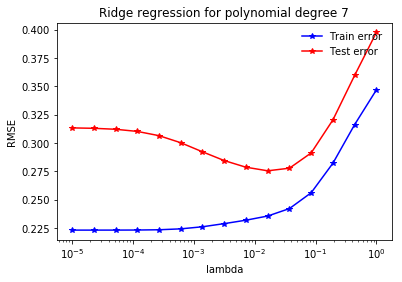

In [26]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)